手动运行一个测试看看模型是否会进行正确学习

In [28]:
import numpy
#导入s函数
import scipy.special
#导入绘图函数
import matplotlib.pyplot
%matplotlib inline

import imageio

import glob


In [29]:
#定义：神经网络 类
class neural_Network:
    
    # 初始化神经网络，3层和学习率
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        
        #设置每层的输入隐藏输出的节点个数
        self.i_nodes = inputnodes
        self.h_nodes = hiddennodes
        self.o_nodes = outputnodes
        
        #链接权重模型 link weight matrices: weight_i2h, weight_h2o
        #weight_i2j 意味着从节点i到节点j
        #numpy.random.normal（分布中心值，标准方差，输出的形式）
        #生成初始的权重，根据正态分布。平均值为0，标准方差为节点传入链接数目的开方，即1/根号（传入链接数目），
        #输出的形式为 h节点数*o节点数 的数组
        self.weight_i2h = numpy.random.normal(0.0, pow(self.h_nodes, -0.5),(self.h_nodes, self.i_nodes))
        self.weight_h2o = numpy.random.normal(0.0, pow(self.o_nodes, -0.5),(self.o_nodes, self.h_nodes))
        
        #学习率
        self.lr = learningrate
        
        #激活函数activation function 是 sigmoid 函数，用lambda匿名函数定义
        self.activation_function = lambda x:scipy.special.expit(x)
        
        pass

    #训练神经网络
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array 将输入转成数组
        inputs = numpy.array(inputs_list, ndmin = 2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        #计算 进入隐藏层的信号
        #numpy.dot 数组的点乘
        hidden_inputs = numpy.dot(self.weight_i2h, inputs)
    
        #计算 从隐藏层输出的信号
        hidden_outputs = self.activation_function(hidden_inputs)
    
        #计算 进入最终层的信号
        final_inputs = numpy.dot(self.weight_h2o, hidden_outputs)
    
        #计算 从最终层输出的信号
        final_outputs = self.activation_function(final_inputs)
        
        
        #计算 输出误差
        output_errors = targets - final_outputs
        
        #隐藏层的误差是输出的误差根据权重拆分后，在隐藏层节点重组
        hidden_errors = numpy.dot(self.weight_h2o.T, output_errors)
        
        #用输出误差优化隐藏层和最终层之间的权重:p153页
        self.weight_h2o += self.lr * numpy.dot((output_errors*final_outputs*(1.0-final_outputs)), numpy.transpose(hidden_outputs))
        
        #用隐藏误差优化输入层和隐藏层之间的权重
        self.weight_i2h += self.lr * numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query查询结果——给定输入，从输出节点给出答案。
    def query(self, inputs_list):
    
        # 将输入的数列转换成为2*2的矩阵
        # .T矩阵转置
        inputs = numpy.array(inputs_list, ndmin = 2).T
    
        #计算 进入隐藏层的信号
        #numpy.dot 数组的点乘
        hidden_inputs = numpy.dot(self.weight_i2h, inputs)
    
        #计算 从隐藏层输出的信号
        hidden_outputs = self.activation_function(hidden_inputs)
    
        #计算 进入最终层的信号
        final_inputs = numpy.dot(self.weight_h2o, hidden_outputs)
    
        #计算 从最终层输出的信号
        final_outputs = self.activation_function(final_inputs)
    
        return final_outputs

In [30]:
# 输入 各个层的节点个数
# 输入层：28*28=784
input_nodes = 784
#隐藏层：随机
hidden_nodes = 500
#输出层
output_nodes = 10 
# 输入 学习速率
learning_rate = 0.1
# 创建输入神经网络样例
n = neural_Network(input_nodes, hidden_nodes, output_nodes, learning_rate)


In [31]:
#加载文件训练
training_data_file = open ("mnist_train.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()


In [32]:
#训练神经网络


#epochs 是训练次数
epochs = 10

for e in range(epochs):
    #经过训练数据集里的所有记录
    for record in training_data_list:
        #根据“，”分割
        all_values = record.split(',')
        #将输入变为0.01~0.99
        inputs = (numpy.asfarray(all_values[1:])/255.0 *0.99)+0.01
        #建立目标输出值（均为0.01，除了正确答案为0.99）
        targets = numpy.zeros(output_nodes)+0.01
        #all_values[0]是正确答案,设置为0.99
        targets[int(all_values[0])]=0.99
        n.train(inputs, targets)
        pass
    pass

我们认为，神经网络应该可以发现在输入中的特征或模式，这些模式或特征可以使用比输入本身更加间简短的形式表达，因此没有选择比784大的数字。

In [38]:
#加载我们自己的文件测试,将文件放入到test_data_list

our_own_dataset = []

#加载png图像到测试数据集
for image_file_name in glob.glob('自己的图像/2828_my_own_?.png'):
    #使用文件名设定正确的标志
    label = int(image_file_name[-5:-4])
    
    print('loading...',image_file_name)
    #as_grey 将图像编程简单到浮点数数组。如果颜色是彩色的会变成所要的灰度。
    img_array = imageio.imread(image_file_name, as_gray =True)

    #重塑数组，将其从28*28变成很长的一串数值
    img_data = 255.0 - img_array.reshape(784)
    
    img_data = (img_data / 255.0 *0.99)+0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    #增加标签和图像数据到测试集
    record = numpy.append(label,img_data)
    our_own_dataset.append(record)
    
    pass

loading... 自己的图像/2828_my_own_3.png
0.01
1.0
loading... 自己的图像/2828_my_own_2.png
0.01
1.0
loading... 自己的图像/2828_my_own_5.png
0.01
0.86800003
loading... 自己的图像/2828_my_own_4.png
0.01
0.93011767
loading... 自己的图像/2828_my_own_6.png
0.01
1.0


[[1.21684685e-03]
 [5.93115520e-03]
 [2.83073306e-01]
 [2.58631682e-01]
 [4.47144475e-03]
 [8.31204310e-04]
 [8.84917343e-05]
 [1.44333997e-01]
 [3.26094630e-05]
 [9.68574289e-04]]
networks says 2
match!


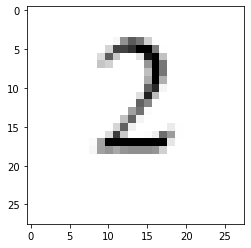

In [40]:
#测试自己的图像

item = 1
matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

#正确的数值是数据中第一个数
correct_label = our_own_dataset[item][0]

#测试的数据是剩下的数字
inputs = our_own_dataset[item][1:]

#启动
outputs = n.query(inputs)
print(outputs)

#
label = numpy.argmax(outputs)
print("networks says", label)

if (label==correct_label):
    print("match!")
else:
    print("wrong!")
    pass